# Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


In [1]:
import pandas as pd

In [2]:
water_df = pd.read_csv('water.csv')
water_df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'связь между жёсткостью воды и средней годовой смертностью'}, xlabel='hardness', ylabel='mortality'>

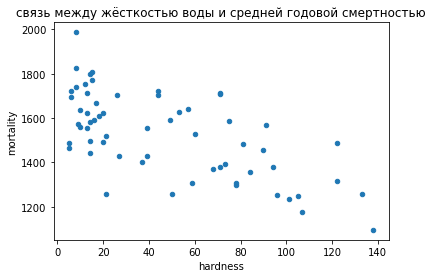

In [3]:
# Построить точечный график
import matplotlib.pyplot as plt

water_df.plot(kind='scatter', x='hardness', y='mortality', title='связь между жёсткостью воды и средней годовой смертностью')

# можно предположить слабую отрицательную корреляцию

In [4]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
water_df[['hardness', 'mortality']].corr() # Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
water_df[['hardness', 'mortality']].corr(method='spearman') # Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
# коэффициенты показыват примерно одинаковые отрицательные значения

In [7]:
# Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = water_df[['hardness']]
y = water_df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [11]:
# коеффициенты модели
print(model.coef_)
print(model.intercept_)

[-3.13167087]
1668.9722977277095


In [12]:
# y = -3.13x + 1668.97

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [14]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test) 

0.5046490611017092

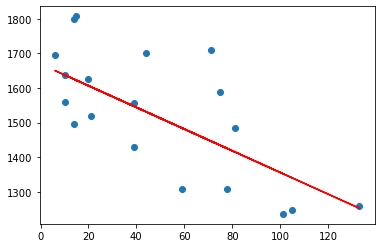

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [16]:
# модель работает, но коэффициент детерминации не очень высокий

# Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [17]:
#     Разделить данные на 2 группы

north_water_df = water_df[water_df['location'] == 'North']
south_water_df = water_df[water_df['location'] == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

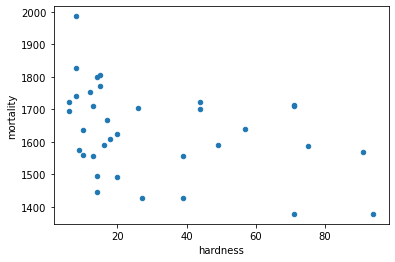

In [18]:
north_water_df.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

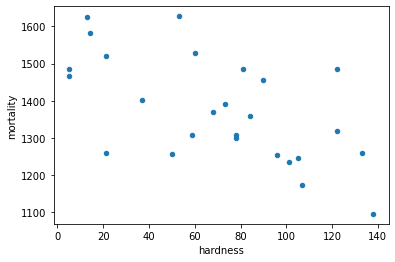

In [19]:
south_water_df.plot(kind='scatter', x='hardness', y='mortality')

In [20]:
print(north_water_df[['hardness', 'mortality']].corr())
print(north_water_df[['hardness', 'mortality']].corr(method='spearman'))

           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [21]:
print(south_water_df[['hardness', 'mortality']].corr())
print(south_water_df[['hardness', 'mortality']].corr(method='spearman'))

           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


0.018885304285745863


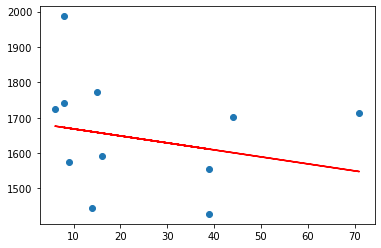

In [22]:
X = north_water_df[['hardness']]
y = north_water_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [24]:
# модель работает, но коэф. детерминации всего 0,019 - очень неточно

-2.551922301235205


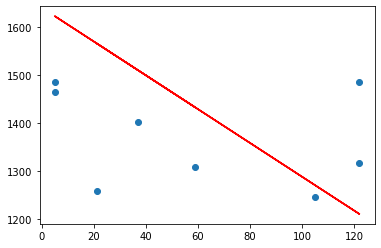

In [23]:
X = south_water_df[['hardness']]
y = south_water_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')


In [ ]:
# модель для южных городов имеет отрицательный коэф. детерминации, прогнозы не работают